### OCR Demo

In [9]:
import os
import cv2
import pyewts
from glob import glob
from tqdm import tqdm

from natsort import natsorted
from Lib.Data import OCRStatus
from Lib.Inference import OCRPipeline
from Lib.Exporter import JsonExporter, PageXMLExporter, TextExporter
from Lib.Config import init_line_model, init_layout_model, init_ocr_model
from Lib.Utils import show_image, create_dir, get_file_name, read_layout_model_config

converter = pyewts.pyewts()

In [10]:
data_path = "SampleData"
output_dir = os.path.join(data_path, "Output")
create_dir(output_dir)

xml_exporter = PageXMLExporter(output_dir)
json_exporter = JsonExporter(output_dir)
text_exporter = TextExporter(output_dir)

img_ext = "jpg"
image_paths = natsorted(glob(f"{data_path}/*.{img_ext}"))

print(f"Images: {len(image_paths)}")

Images: 5


(927, 3000, 3)
SampleData\I2KG2290560412.jpg
I2KG2290560412


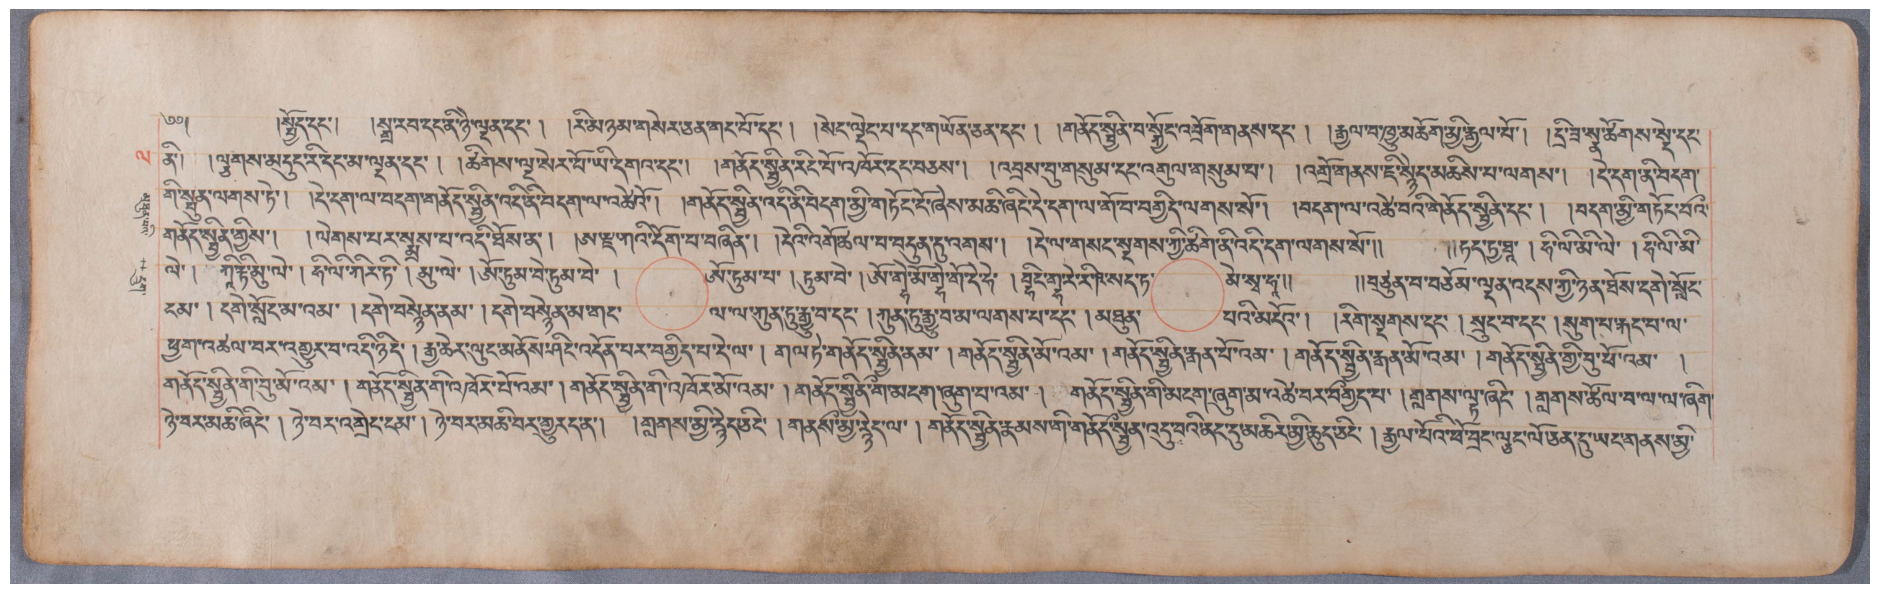

In [ ]:
idx = 2
img = cv2.imread(image_paths[idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_name = get_file_name(image_paths[idx])
show_image(img)

#### OCR via Pipelines using a line or layout model

In [12]:
# get model configs from HuggingFace models
line_model_config_file = init_line_model()
layout_model_config_file = init_layout_model()

layout_model_config = read_layout_model_config(layout_model_config_file)

Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 3001.65it/s]


In [13]:
ocr_model_config = init_ocr_model("Namgyal")
ocr_pipeline = OCRPipeline(ocr_model_config, layout_model_config, output_dir)

Fetching 9 files: 100%|██████████| 9/9 [00:00<00:00, 409.10it/s]
f:\Github\Namgyal-OCR\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Running OCR in Layout Mode


9
@//spyod dang //sgra rab dang ni nye ldan dang //ri mnyam gser can gang po dang //seng ldeng pa dang g.yon can dang //gnod sbyin ba skyong 'brog gnas dang //rgyal ba khyu mchog myi rgyal po //dri za sna tshogs sde dang 
//lcags mdung ri dang ma ldan dang //tshigs lnga ser po yi dga' dang //gnod sbyin ring po 'khor dang bcas //'bras bu gsum dang 'gul gsum pa //'gro gnas ji snyed mchis pa lags //de dag ni bdag 
syn lags te //de dag la bdag gnod sbyin 'di ni bdag la 'tshe'o //gnod sbyin 'di ni bdag myi gtong ngo zhes mchi zhing de dag la go ba bgyid lags so //bdag la 'tshe ba'i gnod sbyin dang //bdag myi gtong ba'-i 
o sbyin gyis //legs par smras pa 'di thos na //a rdza ka'i dog pa bzhin //de'i 'go tshal ba bdun du 'gas //de la gsang sngags kyi tshig ni 'di dag lags so ///tad t+ya thA /hi li mi le /hi li mi 
 /k+hI rti mu le /hi li kir ti /mu le /AoM tum be tum be /AoM tum pa /tum be /oM g+hi mo g+he go de he /b+hing g+ha re ri Sha sad ta me swa hA ////btsun ba bcom ldan 'das kyi nyan t

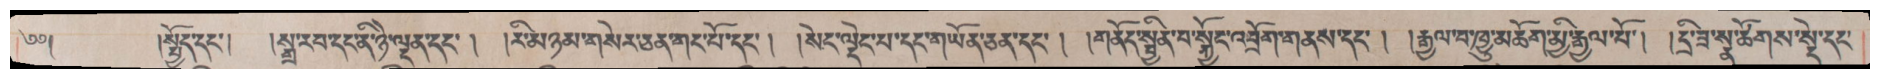

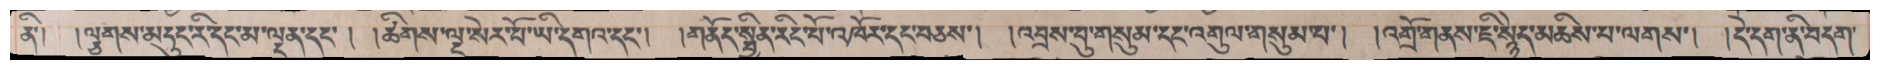

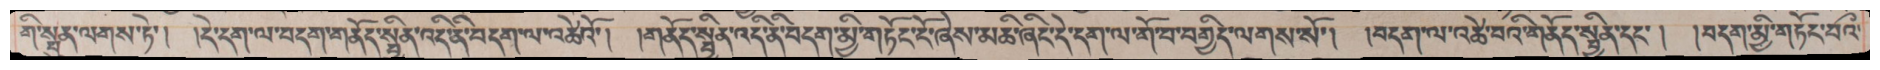

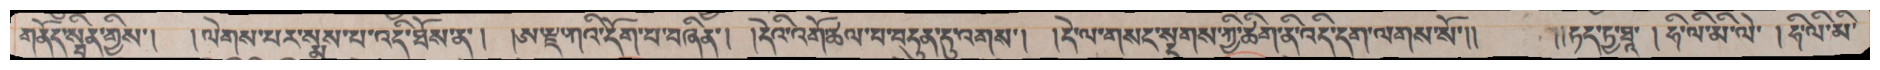

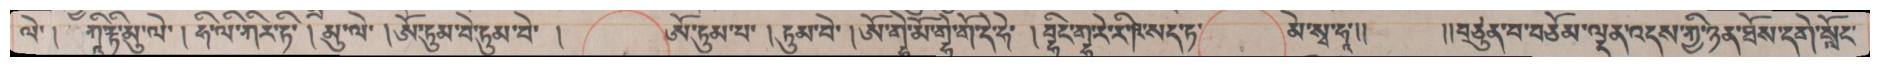

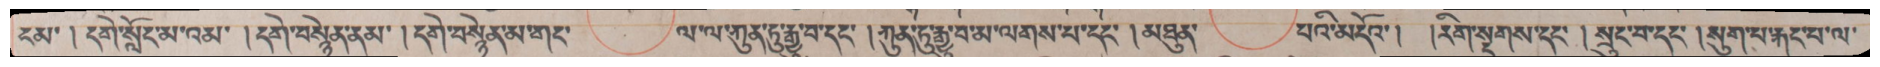

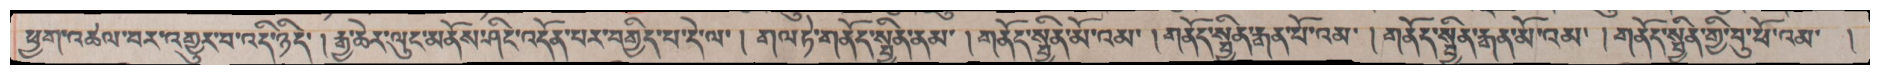

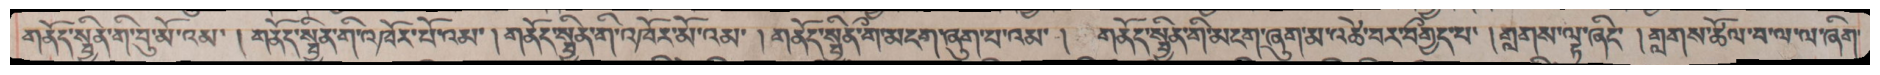

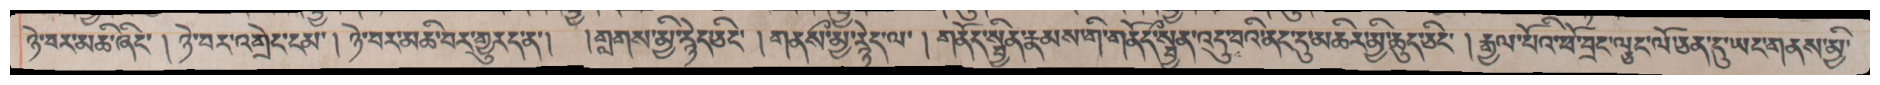

In [14]:
status, ocr_result = ocr_pipeline.run_ocr(img, image_name, k_factor=2.0, bbox_tolerance=2.5)
print(len(ocr_result.line_images))


for t_line in ocr_result.text:
    print(t_line)

for l_img in ocr_result.line_images:
      show_image(l_img)

In [15]:
text_exporter = TextExporter(output_dir)

if len(image_paths) > 0:
    for idx, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
        image_name = get_file_name(image_path)
        img = cv2.imread(image_path)
        status, ocr_result = ocr_pipeline.run_ocr(img, image_name, k_factor=2.0, bbox_tolerance=2.5)

        if status == OCRStatus.SUCCESS:
            if len(ocr_result.lines) > 0:
                text_exporter.export_lines(img, image_name, ocr_result.lines, ocr_result.text)

100%|██████████| 5/5 [00:34<00:00,  7.00s/it]
